In [1]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

提取 CN05.1 逐年的七月份降水日平均值（矩形经纬度网格区域）

绘制时间序列，抓七月降水极大和极小值

In [2]:
# time series dir: /raid52/yycheng/MPAS/REFERENCE/CMORPH/DAILY/spatialmean
# year   = "2003"
dirin  = "/raid52/yycheng/MPAS/REFERENCE/CN05.1/1961-2018" 
# filein = "july_monthmean.nc"
filein = "CN05.1_Pre_1961_2018_daily_025x025.nc"
ds_disk = xr.open_dataset(dirin + "/" + filein)

temp1 = ds_disk['pre'].loc[ds_disk.time.dt.month==7]
select_dict = {}

# select domain
lc = ds_disk.coords['lon']
la = ds_disk.coords['lat']
# select_dict['lon'] = lc[(lc>70)&(lc<105)]
select_dict['lon'] = lc
# select_dict['lat'] = la[(la>25)&(la<40)]
select_dict['lat'] = la

sel_tibet = temp1.loc[select_dict]
sel_tibet = sel_tibet.mean(dim=['lat','lon'])
# caculate monthy mean
temp2 = sel_tibet.groupby('time.year').mean()
# df_plot = pd.DataFrame(temp2) 
df_plot = temp2.to_dataframe()

# df_plot = ds_disk.drop(['lat','lon'])['pre'][:,0,0].to_dataframe()

稍微练习一下 pandas 的groupby 命令

In [60]:
# 使用 groupby 按时间坐标的年分组并进行平均处理
# sel_tibet.groupby('time.year').mean()
sel_tibet.groupby('time.year')#.mean()

DataArrayGroupBy, grouped over 'year' 
58 groups with labels 1961, 1962, 1963, ..., 2017, 2018.

In [15]:
df_plot['obs'] = -df_plot['pre']
df_plot.head()

,pre,obs
time,,
1961-12-31,3.663701,-3.663701
1962-12-31,3.868422,-3.868422
1963-12-31,4.080493,-4.080493
1964-12-31,3.541774,-3.541774
1965-12-31,3.593956,-3.593956


In [50]:
# df_plot.index = pd.data
# df_plot.index = pd.date_range(start='1961',end='2019',freq='y')
# 使用pandas频率代码来调节具体的年初\年末的问题
df_plot.index = pd.date_range(start='1961',periods=58,freq='AS')
df_plot.index.name = 'time'
df_plot.index

DatetimeIndex(['1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
      

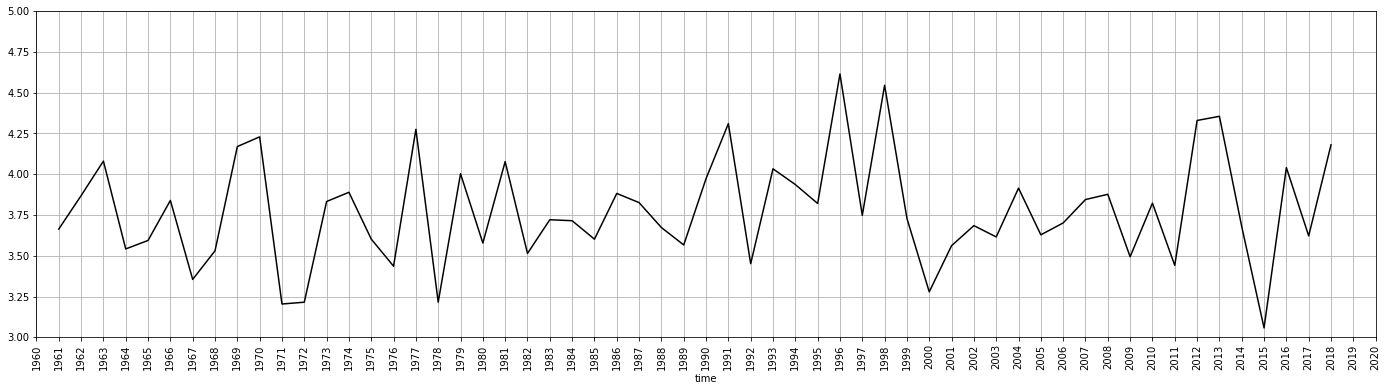

In [51]:
import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import datetime


# create xticks
xticks = pd.date_range(datetime.datetime(1960,1,1), datetime.datetime(2020,1,1), freq='ys')

plt.figure(figsize=(12,6))

ymin = 0.
ymax = 5.
years = mdates.YearLocator(1)
years_fmt = mdates.DateFormatter('%y')

# ax = df_plot['pre'].plot(figsize=(24,6),color = 'k',xticks=xticks.to_pydatetime())
ax = df_plot['pre'].plot(figsize=(24,6),color='k',xticks=xticks.to_pydatetime(),ylim=[3,5])
ax.set_xticklabels([x.strftime('%Y') for x in xticks]); 
plt.xticks(rotation=90);
ax.xaxis.grid()
ax.yaxis.grid()

plt.savefig("./output_pic/" + "julymean_timseries.png")

下面练习下进行time series图的绘制

In [5]:
df_plot.head()

,pre
time,
1961-12-31,3.663701
1962-12-31,3.868422
1963-12-31,4.080493
1964-12-31,3.541774
1965-12-31,3.593956


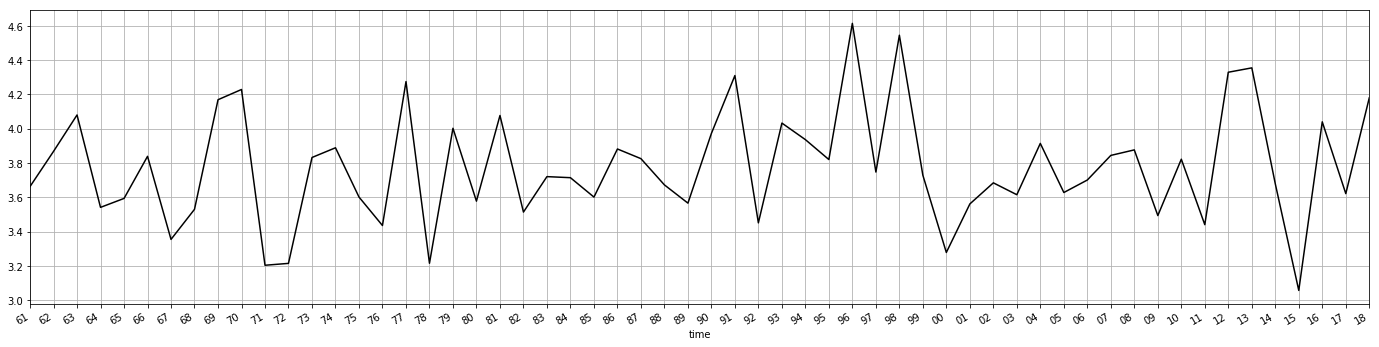

In [53]:
import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize=(24,6))
# 需要添加 x_cmopat! 否则只会在x轴显示
df_plot['pre'].plot(ax=ax, x_compat=True, color = 'k')
ax.xaxis.grid()
ax.yaxis.grid()
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y"))

plt.show()